# Coauthor network

This notebook accompanies

> Hall, M (2017). Three data analytics party tricks. _The Leading Edge_ **36** (3).

We're going to load the data I made in [Generate_GML_file.ipynb](Generate_GML_file.ipynb) and explore it a bit.

## Import the data and get some basic facts

In [1]:
import operator
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.read_gml('data/coauthors.gml')

In [4]:
len(G.nodes())

9642

In [5]:
len(G.edges())

20237

In [6]:
len(nx.isolates(G))

774

## Look at some centrality measures

In [7]:
# Emphasizes number of different collaborators.
ec = nx.eigenvector_centrality_numpy(G)
sorted(ec.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('CAiken', 0.2304003319872127),
 ('GKeller', 0.22055195890195742),
 ('DRavat', 0.218350562015495),
 ('WHinze', 0.21740738999227194),
 ('MPilkington', 0.2150076493194817),
 ('GFlanagan', 0.21104157876817492),
 ('RMorin', 0.20910852872322094),
 ('JBrozena', 0.2080789944531786),
 ('MWebring', 0.20778068228679256),
 ('BCoakley', 0.20764416443310998)]

We should really weight the eigenvector centrality measure. From the docs:

> If None, all edge weights are considered equal. Otherwise holds the name of the edge attribute used as weight.

In [8]:
# Emphasizes number of publications and repeated collaborations.
ecw = nx.eigenvector_centrality_numpy(G, weight='value')
sorted(ecw.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('JSchleicher', 0.5537947651968088),
 ('MTygel', 0.5057623359590954),
 ('PHubral', 0.49478626568504547),
 ('JCosta', 0.2712235703359589),
 ('ANovais', 0.2164267257243961),
 ('LSantos', 0.11256500893370404),
 ('DAmazonas', 0.0921600161476991),
 ('GHocht', 0.07717941684157219),
 ('TCoimbra', 0.07686031660654398),
 ('CHanitzsch', 0.07523688718038163)]

In [9]:
# This one takes several minutes.
# How many paths between other authors is each author on? 
# A proxy for 'most likely to intercept information'.
bc = nx.betweenness_centrality(G)
sorted(bc.items(), key=operator.itemgetter(1), reverse=True)[:5]

[('GMcmechan', 0.03887714428476692),
 ('JHarris', 0.024386351851918824),
 ('BGurevich', 0.023418863843724207),
 ('SSingh', 0.02247649975087789),
 ('SFomel', 0.021243779446348723)]

In [10]:
dc = nx.degree_centrality(G)
sorted(dc.items(), key=operator.itemgetter(1), reverse=True)[:5]

[('GMcmechan', 0.011305881132662586),
 ('MToksoz', 0.007882999688828959),
 ('AGreen', 0.007882999688828959),
 ('ARevil', 0.006742039207551084),
 ('KMarfurt', 0.006534591847318742)]

In [11]:
# This one takes a while too.
cc = nx.closeness_centrality(G)
sorted(cc.items(), key=operator.itemgetter(1), reverse=True)[:5]

[('JHarris', 0.1645287141026006),
 ('GMcmechan', 0.16411039579637735),
 ('MBatzle', 0.16187858716403522),
 ('ITsvankin', 0.16165018704105247),
 ('SSingh', 0.16061342314561514)]

In [12]:
sorted(nx.katz_centrality_numpy(G).items(), key=operator.itemgetter(1), reverse=True)[:5]

[('PStoffa', 0.1663638699712275),
 ('CTorresVerdin', 0.1654486207826173),
 ('MrinalSen', 0.1641645812843859),
 ('JianghaiXia', 0.11941469368852534),
 ('MFehler', 0.11620711963562425)]

In [13]:
sorted(nx.pagerank(G).items(), key=operator.itemgetter(1), reverse=True)[:5]

[('GMcmechan', 0.0025321559084457157),
 ('MToksoz', 0.0013246743168887306),
 ('KMarfurt', 0.00117437771895071),
 ('MLandro', 0.0011539628097043191),
 ('CTorresVerdin', 0.001076132491742195)]

Get the degree of the most connected nodes.

In [14]:
sorted(nx.degree(G).items(), key=operator.itemgetter(1), reverse=True)[:10]

[('GMcmechan', 109),
 ('MToksoz', 76),
 ('AGreen', 76),
 ('ARevil', 65),
 ('KMarfurt', 63),
 ('MLandro', 59),
 ('YZhang', 58),
 ('CJuhlin', 57),
 ('MFehler', 57),
 ('BUrsin', 56)]

## Six degrees of Sergey Fomel

In [15]:
for person in ['CLiner',
               'LLines',
               'RBachrach',
               'BRussell',
               'LThomsen',
               'STreitel',
               'PAvseth',
               'JClaerbout',
               'GMcmechan',
               'JCarcione',
               'VGrechka',
               'JHarris',
              ]:
    try:
        p = nx.shortest_path(G, source='SFomel', target=person)
        print("{}'s Fomel number = {}".format(person, len(p) - 1))
    except:
        print("{} is not connected".format(person))

CLiner's Fomel number = 3
LLines's Fomel number = 3
RBachrach's Fomel number = 3
BRussell's Fomel number = 4
LThomsen's Fomel number = 2
STreitel's Fomel number = 3
PAvseth's Fomel number = 2
JClaerbout's Fomel number = 1
GMcmechan's Fomel number = 3
JCarcione's Fomel number = 2
VGrechka's Fomel number = 2
JHarris's Fomel number = 2


## Giant component

In [16]:
# Component sizes:
list(reversed(sorted(len(X.nodes()) for X in nx.connected_component_subgraphs(G))))[:10]

[6648, 37, 23, 18, 16, 13, 13, 12, 12, 11]

In [17]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [18]:
# Slow.
# nx.diameter(Gc)

In [19]:
# Proportion of graph in giant component
len(Gc.nodes()) / len(G.nodes())

0.6894835096453018

## Draw the graph!

There are too many nodes to see what's going on, so we reduce it in two ways:

- Use only the giant component
- remove nodes with degree < 11 (quite a lot!)

We'll also scale the size of nodes according to degree, which will emphasize the more collaborative authors.

In [20]:
deg = nx.degree(Gc)

In [21]:
to_keep = [n for n in deg if deg[n] > 10]
Gc5 = Gc.subgraph(to_keep)
Gc5c = max(nx.connected_component_subgraphs(Gc5), key=len)

In [22]:
deg = nx.degree(Gc5c)

In [23]:
nodes = [(k, v) for k, v in deg.items()]

In [24]:
nlist = [i[0] for i in nodes]
nsize = [4 * i[1] for i in nodes]

## HIGHLIGHT BRussell to SFomel

In [25]:
person = "GFlanagan"
p = nx.shortest_path(Gc5c, source='SFomel', target=person)
p_edges = list(zip(p, p[1:]))

labels = {}    
for node in Gc5c.nodes():
    if node in p:
        labels[node] = node

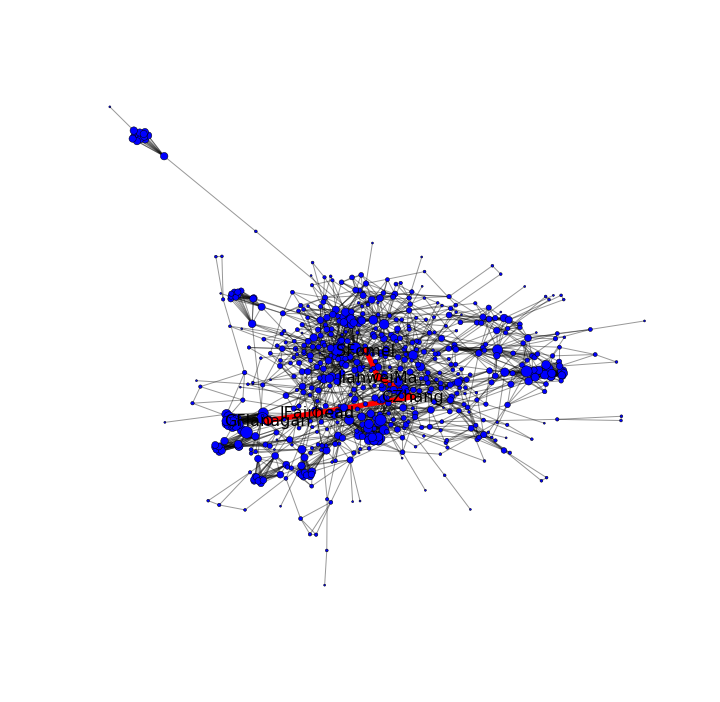

In [26]:
plt.figure(figsize=(12,12))

# Draw the main part.
graph_pos = nx.spring_layout(Gc5c)
nx.draw_networkx_edges(Gc5c, graph_pos, nodelist=nlist, alpha=0.4, zorder=1)
nx.draw_networkx_nodes(Gc5c, graph_pos, nodelist=nlist, node_color='blue', node_size=nsize, linewidths=0.5, zorder=2)

# Highlight the extra path
nx.draw_networkx_edges(Gc5c, graph_pos, edgelist=p_edges, edge_color='red', width=5, zorder=9)
nx.draw_networkx_nodes(Gc5c, graph_pos, nodelist=p, node_size=nsize, node_color='red', zorder=10)
nx.draw_networkx_labels(Gc5c, graph_pos, labels, font_size=16)

plt.axis('off')
#plt.savefig("manuscript/figure_1.png", bbox_inches='tight', dpi=300)
#plt.savefig("manuscript/figure_1.svg", bbox_inches='tight')
plt.show()

<hr />

&copy; 2017 Agile Scientific, licensed under CC-BY (text) and Apache 2.0 (code)